In [5]:
# Parts of this code are translated from Matlab code by Tom Huber, a Professor of Physics at Gustavus Adolphus College 

# Import packages
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt

In [6]:
# Set up model inputs
A = 221.3
B = 1.25
S0 = 1370/4
albedo = 0.32
Frad = 0
Cm = 2.08E08  #Heat capacity
W = 0 #we set the weather-induced heat flux to zero for now. 


#dYears = 0.05 #the number of years we step forward in one timestep
T0 = 273.15 #conversion for Kelvin to Celsius

D = 16.39*10**4
a = 6.371*10**6


nt = 4000  #number of timesteps

dmu = 0.02
mu = np.arange(-1,1.00001,dmu)
nx = mu.size

In [25]:
Time = np.zeros(nt)
Temp = np.ones((nx, nt))*14.8
dt = 0.5*24*60*60 #timestep in days, converted to seconds by multiplying by 24hrs*60mins*60seconds

##change in time for .75 days
dt_075 = 0.75 * 24 * 60 * 60


#change in time for one day
dt_1 = 1.0 * 24 * 60 * 60
dYears = dt/24*60*60/365.25

In [8]:
FI = (0.68- 0.24*scipy.special.eval_legendre(2, mu))*(1-0.5*scipy.special.eval_legendre(2, mu))*S0-A

In [9]:
for t in range(1,nt):#nt
    T = Temp[:,t-1]
    Time[t] = (t-1)*dYears
    S = dt*D/dmu**2/a**2

    mu_halfpoints = np.zeros(nx+1)
    mu_halfpoints[1:-1] = (mu[1:]+mu[:-1])/2
    mu_halfpoints[0]=mu_halfpoints[1]-dmu
    mu_halfpoints[-1]=mu_halfpoints[-2]+dmu
    M_plus =  (1-mu_halfpoints[1:]**2)
    M_minus = (1-mu_halfpoints[:-1]**2)
    T_ghost = np.zeros(nx+2)
    T_ghost[1:-1] = T
    T_ghost[0]=T_ghost[1]
    T_ghost[-1]=T_ghost[-2]
    Temp[:,t] = T + S * (M_plus * T_ghost[2:] - (M_plus+M_minus)*T_ghost[1:-1] +M_minus * T_ghost[:-2]) - dt*(T)*B/Cm + dt *FI/Cm


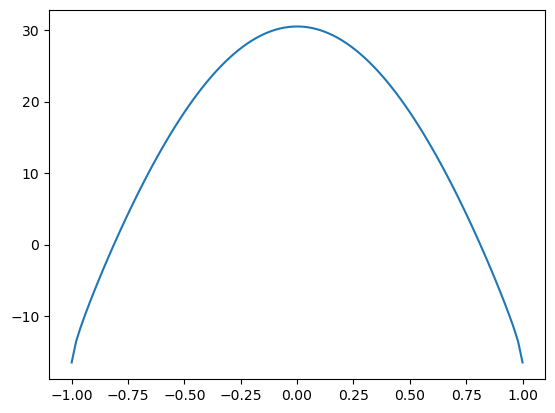

In [18]:
plt.plot(mu, Temp[:,3999]) 
#Note that the  number in this expression allows you to choose which timestep to plot, 
#but you need to figure out the relationship between this number and the actual time that youare plotting. 


##Ichanged it to 3999 because I got an error sayign that the size is 4000??

In [19]:
t1 = 800
t2 = 1600
t3 = 2400 
t4 = 3200
t5 = 3999

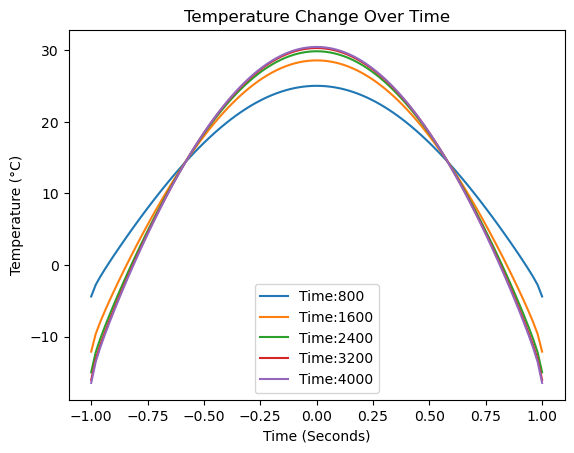

In [21]:
plt.figure()
plt.plot(mu, Temp[:, t1], label = "Time:800")
plt.plot(mu, Temp[:, t2], label = "Time:1600")
plt.plot(mu, Temp[:, t3], label = "Time:2400")
plt.plot(mu, Temp[:, t4], label = "Time:3200")
plt.plot(mu, Temp[:, t5], label = "Time:4000")



plt.xlabel('Time (Seconds)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Change Over Time')
plt.show()

In [30]:
### changing delta t to .75 days


In [31]:
for t in range(1,nt):#nt
    T = Temp[:,t-1]
    Time[t] = (t-1)*dYears
    S = dt_075*D/dmu**2/a**2

    mu_halfpoints = np.zeros(nx+1)
    mu_halfpoints[1:-1] = (mu[1:]+mu[:-1])/2
    mu_halfpoints[0]=mu_halfpoints[1]-dmu
    mu_halfpoints[-1]=mu_halfpoints[-2]+dmu
    M_plus =  (1-mu_halfpoints[1:]**2)
    M_minus = (1-mu_halfpoints[:-1]**2)
    T_ghost = np.zeros(nx+2)
    T_ghost[1:-1] = T
    T_ghost[0]=T_ghost[1]
    T_ghost[-1]=T_ghost[-2]
    Temp[:,t] = T + S * (M_plus * T_ghost[2:] - (M_plus+M_minus)*T_ghost[1:-1] +M_minus * T_ghost[:-2]) - dt_075*(T)*B/Cm + dt_075 *FI/Cm


C:\Users\devya\AppData\Local\Temp\ipykernel_35456\908778.py:16: RuntimeWarning: overflow encountered in multiply
  Temp[:,t] = T + S * (M_plus * T_ghost[2:] - (M_plus+M_minus)*T_ghost[1:-1] +M_minus * T_ghost[:-2]) - dt_075*(T)*B/Cm + dt_075 *FI/Cm
C:\Users\devya\AppData\Local\Temp\ipykernel_35456\908778.py:16: RuntimeWarning: invalid value encountered in add
  Temp[:,t] = T + S * (M_plus * T_ghost[2:] - (M_plus+M_minus)*T_ghost[1:-1] +M_minus * T_ghost[:-2]) - dt_075*(T)*B/Cm + dt_075 *FI/Cm
C:\Users\devya\AppData\Local\Temp\ipykernel_35456\908778.py:16: RuntimeWarning: invalid value encountered in subtract
  Temp[:,t] = T + S * (M_plus * T_ghost[2:] - (M_plus+M_minus)*T_ghost[1:-1] +M_minus * T_ghost[:-2]) - dt_075*(T)*B/Cm + dt_075 *FI/Cm


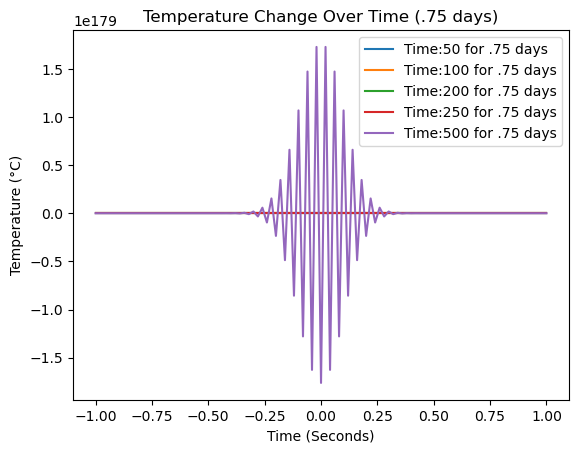

In [35]:
plt.figure()
plt.plot(mu, Temp[:, 50], label = "Time:50 for .75 days")
plt.plot(mu, Temp[:, 100], label = "Time:100 for .75 days")
plt.plot(mu, Temp[:, 200], label = "Time:200 for .75 days")
plt.plot(mu, Temp[:, 250], label = "Time:250 for .75 days")
plt.plot(mu, Temp[:, 500], label = "Time:500 for .75 days")



plt.xlabel('Time (Seconds)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Change Over Time (.75 days)')
plt.show()

In [36]:
for t in range(1,nt):#nt
    T = Temp[:,t-1]
    Time[t] = (t-1)*dYears
    S = dt_1*D/dmu**2/a**2

    mu_halfpoints = np.zeros(nx+1)
    mu_halfpoints[1:-1] = (mu[1:]+mu[:-1])/2
    mu_halfpoints[0]=mu_halfpoints[1]-dmu
    mu_halfpoints[-1]=mu_halfpoints[-2]+dmu
    M_plus =  (1-mu_halfpoints[1:]**2)
    M_minus = (1-mu_halfpoints[:-1]**2)
    T_ghost = np.zeros(nx+2)
    T_ghost[1:-1] = T
    T_ghost[0]=T_ghost[1]
    T_ghost[-1]=T_ghost[-2]
    Temp[:,t] = T + S * (M_plus * T_ghost[2:] - (M_plus+M_minus)*T_ghost[1:-1] +M_minus * T_ghost[:-2]) - dt_1*(T)*B/Cm + dt_1 *FI/Cm


C:\Users\devya\AppData\Local\Temp\ipykernel_35456\3369497282.py:16: RuntimeWarning: overflow encountered in multiply
  Temp[:,t] = T + S * (M_plus * T_ghost[2:] - (M_plus+M_minus)*T_ghost[1:-1] +M_minus * T_ghost[:-2]) - dt_1*(T)*B/Cm + dt_1 *FI/Cm
C:\Users\devya\AppData\Local\Temp\ipykernel_35456\3369497282.py:16: RuntimeWarning: invalid value encountered in add
  Temp[:,t] = T + S * (M_plus * T_ghost[2:] - (M_plus+M_minus)*T_ghost[1:-1] +M_minus * T_ghost[:-2]) - dt_1*(T)*B/Cm + dt_1 *FI/Cm
C:\Users\devya\AppData\Local\Temp\ipykernel_35456\3369497282.py:16: RuntimeWarning: invalid value encountered in subtract
  Temp[:,t] = T + S * (M_plus * T_ghost[2:] - (M_plus+M_minus)*T_ghost[1:-1] +M_minus * T_ghost[:-2]) - dt_1*(T)*B/Cm + dt_1 *FI/Cm


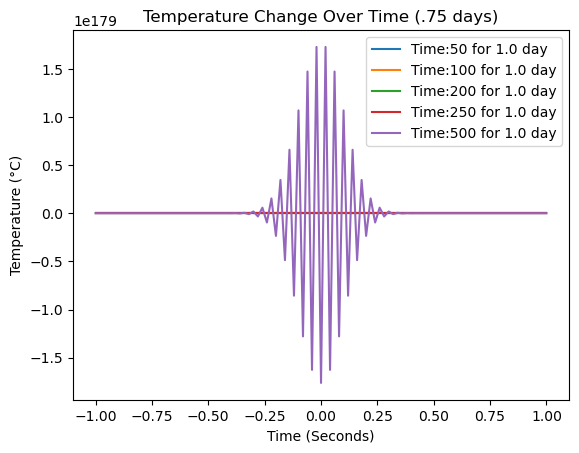

In [38]:
plt.figure()
plt.plot(mu, Temp[:, 50], label = "Time:50 for 1.0 day")
plt.plot(mu, Temp[:, 100], label = "Time:100 for 1.0 day")
plt.plot(mu, Temp[:, 200], label = "Time:200 for 1.0 day")
plt.plot(mu, Temp[:, 250], label = "Time:250 for 1.0 day")
plt.plot(mu, Temp[:, 500], label = "Time:500 for 1.0 day")



plt.xlabel('Time (Seconds)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Change Over Time (.75 days)')
plt.show()